In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [29]:
# only get data analyst jobs in the us

df_DA_US = df[
    (df['job_country'] == 'United States')&
    (df['job_title_short'] == 'Data Analyst')
].copy()

# drop NaN values from the salary_year_avg column for accurate visualization
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

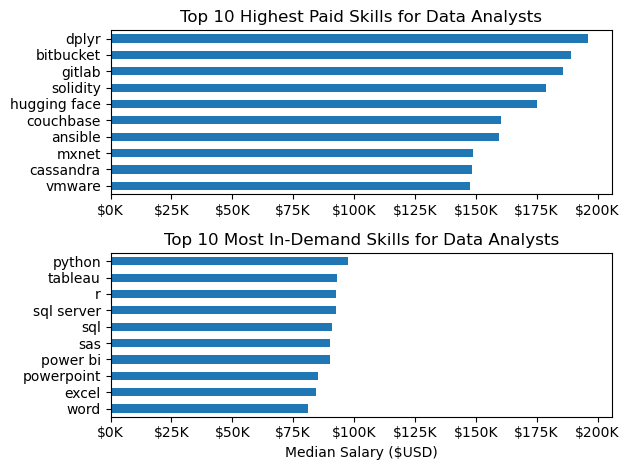

In [46]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_US_top_pay = df_DA_US_group.sort_values(by='median',ascending=False).head(10)

df_DA_US_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

fig, ax = plt.subplots(2,1)

# instead of using ax[0].invert_yaxis us this method to invert axis

# chart1 (ax[0])
df_DA_US_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# chart2 (ax[1])
df_DA_US_skills[::-1].plot(kind='barh',y='median',ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
# set lim as same as the first graph
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()
plt.show()